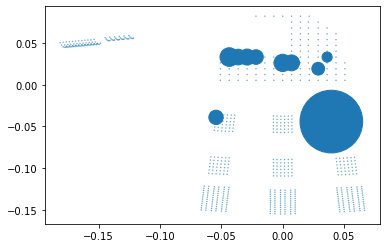

In [16]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython import display

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12
%matplotlib inline

# %matplotlib notebook
# %matplotlib auto
# %config InlineBackend.figure_format = 'svg'

data = np.load('../real_controller.npy', allow_pickle=True)
cal_table = np.load('calibration_table.npy')
data = data.item()

tactile_log = np.array(data['tactile_log'])
tactile_pos_log = np.array(data['tactile_pos_log'])

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111)

index1 = 0
index2 = 653
for i in range(10):
    plt.cla()

    x = tactile_pos_log[i,:,0]
    y = tactile_pos_log[i,:,1]
    z = tactile_pos_log[i,:,2]
    tac = tactile_log[i,:]

    tac[tac < cal_table[:, 1]] = 0
    tac[tac > cal_table[:, 2]] = cal_table[tac > cal_table[:, 2], 2]
    tac *= cal_table[:, 0]
    
    x = x[index1:index2]
    y = y[index1:index2]
    z = z[index1:index2]

    tac = tac[index1:index2]
    
#     ax.scatter(x, y,s=(tac) * 1000+0.1)

    
    plt.cla()   

    plt.scatter(x, y,s=(tac) * 1000+0.1)
    display.clear_output(wait=True)
    plt.pause(0.00000001) 
    


In [3]:
import rospy
from sensor_msgs.msg import JointState
from std_msgs.msg import Header
from allegro_tactile_cal.msg import tactile_msgs
import numpy as np
import time 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython import display

%matplotlib inline

class tactile_show():
    def __init__(self):
        
        self.tac_buf = np.zeros(653)
        self.tac = np.zeros(653)
        tactile_pos = np.load('./tac_pos.npy', allow_pickle=True)
        self.x = tactile_pos[:,0]
        self.y = tactile_pos[:,1]
    
        self.cal_table = np.load('calibration_table.npy')
        self.pub = rospy.Publisher('/allegroHand_0/joint_cmd', JointState, queue_size=10)
        self.sub_tactile = rospy.Subscriber('allegro_tactile', tactile_msgs, self.allegro_tactile_callback)
        rospy.init_node('allegro_hand', anonymous=True)
        
        self.initialize()
    def allegro_tactile_callback(self, msg):
        self.tac_buf[:113] = np.asarray(msg.palm_Value)

        self.tac_buf[113:113+72] = np.asarray(msg.index_tip_Value)
        self.tac_buf[113+72:113+72+36] = np.asarray(msg.index_mid_Value)
        self.tac_buf[113+72+36:113+144] = np.asarray(msg.index_end_Value)

        self.tac_buf[113+144:113+144+72] = np.asarray(msg.middle_tip_Value)
        self.tac_buf[113+144+72:113+144+108] = np.asarray(msg.middle_mid_Value)
        self.tac_buf[113+144+108:113+288] = np.asarray(msg.middle_end_Value)

        self.tac_buf[113+288:113+288+72] = np.asarray(msg.ring_tip_Value)
        self.tac_buf[113+288+72:113+288+108] = np.asarray(msg.ring_mid_Value)
        self.tac_buf[113+288+108:113+288+144] = np.asarray(msg.ring_end_Value)

        self.tac_buf[113+432:113+432+72] = np.asarray(msg.thumb_tip_Value)
        self.tac_buf[113+432+72:113+432+108] = np.asarray(msg.thumb_mid_Value)

    def initialize(self):
        self.tac_init = []
        for i in range(5):
            self.tac_init.append(self.tac_buf)
            time.sleep(0.1)
        self.tac_init = np.average(np.array(self.tac_init),axis=0)
        print('initialize success!')
        
    def visualize(self,index1,index2):
        
        plt.cla()
        
        tac = self.tac_buf - self.tac_init
        tac[tac < self.cal_table[:, 1]] = 0
        tac *= self.cal_table[:, 0]
        self.tac_buf_ = tac
        
        self.tac[:15] = [self.tac_buf_[109],self.tac_buf_[105],self.tac_buf_[100],self.tac_buf_[95],self.tac_buf_[90],self.tac_buf_[85],self.tac_buf_[80],self.tac_buf_[75],self.tac_buf_[69],self.tac_buf_[59],self.tac_buf_[48],self.tac_buf_[36],self.tac_buf_[24],self.tac_buf_[12],self.tac_buf_[0]]
        self.tac[15:30] = [self.tac_buf_[109+1],self.tac_buf_[105+1],self.tac_buf_[100+1],self.tac_buf_[95+1],self.tac_buf_[90+1],self.tac_buf_[85+1],self.tac_buf_[80+1],self.tac_buf_[75+1],self.tac_buf_[69+1],self.tac_buf_[59+1],self.tac_buf_[48+1],self.tac_buf_[36+1],self.tac_buf_[24+1],self.tac_buf_[12+1],self.tac_buf_[0+1]]
        self.tac[30:45] = [self.tac_buf_[109+2],self.tac_buf_[105+2],self.tac_buf_[100+2],self.tac_buf_[95+2],self.tac_buf_[90+2],self.tac_buf_[85+2],self.tac_buf_[80+2],self.tac_buf_[75+2],self.tac_buf_[69+2],self.tac_buf_[59+2],self.tac_buf_[48+2],self.tac_buf_[36+2],self.tac_buf_[24+2],self.tac_buf_[12+2],self.tac_buf_[0+2]]
        self.tac[45:60] = [self.tac_buf_[109+3],self.tac_buf_[105+3],self.tac_buf_[100+3],self.tac_buf_[95+3],self.tac_buf_[90+3],self.tac_buf_[85+3],self.tac_buf_[80+3],self.tac_buf_[75+3],self.tac_buf_[69+3],self.tac_buf_[59+3],self.tac_buf_[48+3],self.tac_buf_[36+3],self.tac_buf_[24+3],self.tac_buf_[12+3],self.tac_buf_[0+3]]
        self.tac[60:73] = [self.tac_buf_[100+4],self.tac_buf_[95+4],self.tac_buf_[90+4],self.tac_buf_[85+4],self.tac_buf_[80+4],self.tac_buf_[75+4],self.tac_buf_[69+4],self.tac_buf_[59+4],self.tac_buf_[48+4],self.tac_buf_[36+4],self.tac_buf_[24+4],self.tac_buf_[12+4],self.tac_buf_[0+4]]
        self.tac[73:79] = [self.tac_buf_[59+5],self.tac_buf_[48+5],self.tac_buf_[36+5],self.tac_buf_[24+5],self.tac_buf_[12+5],self.tac_buf_[0+5]]
        self.tac[79:85] = [self.tac_buf_[59+6],self.tac_buf_[48+6],self.tac_buf_[36+6],self.tac_buf_[24+6],self.tac_buf_[12+6],self.tac_buf_[0+6]]
        self.tac[85:91] = [self.tac_buf_[59+7],self.tac_buf_[48+7],self.tac_buf_[36+7],self.tac_buf_[24+7],self.tac_buf_[12+7],self.tac_buf_[0+7]]
        self.tac[91:97] = [self.tac_buf_[59+8],self.tac_buf_[48+8],self.tac_buf_[36+8],self.tac_buf_[24+8],self.tac_buf_[12+8],self.tac_buf_[0+8]]
        self.tac[97:102] = [self.tac_buf_[48+9],self.tac_buf_[36+9],self.tac_buf_[24+9],self.tac_buf_[12+9],self.tac_buf_[0+9]]
        self.tac[102:106] = [self.tac_buf_[36+10],self.tac_buf_[24+10],self.tac_buf_[12+10],self.tac_buf_[0+10]]
        self.tac[106:113] = [self.tac_buf_[74],self.tac_buf_[68],self.tac_buf_[458],self.tac_buf_[36+11],self.tac_buf_[24+11],self.tac_buf_[12+11],self.tac_buf_[0+11]]

        self.tac[113:113+72] = self.tac_buf_[113:113+72]
        self.tac[113+72:113 + 72+36] = self.tac_buf_[113+72:113+72+36].reshape(6,6).transpose().reshape(36)
        self.tac[113+72+36:113+144] = self.tac_buf_[113+72+36:113+144].reshape(6,6).transpose().reshape(36)

        self.tac[113+144:113+144+72] = self.tac_buf_[113+144:113+144+72]
        self.tac[113+144+72:113+144+108] = self.tac_buf_[113+144+72:113+144+108].reshape(6,6).transpose().reshape(36)
        self.tac[113+144+108:113+288] = self.tac_buf_[113+144+108:113+288].reshape(6,6).transpose().reshape(36)

        self.tac[113+288:113+288+72] = self.tac_buf_[113+288:113+288+72]
        self.tac[113+288+72:113+288+108] = self.tac_buf_[113+288+72:113+288+108].reshape(6,6).transpose().reshape(36)
        self.tac[113+288+108:113+288+144] = self.tac_buf_[113+288+108:113+288+144].reshape(6,6).transpose().reshape(36)

        self.tac[113+432:113+432+72] = self.tac_buf_[113+432:113+432+72]
        self.tac[113+432+72:113+432+108] = self.tac_buf_[113+432+72:113+432+108].reshape(6,6).transpose().reshape(36)
        

        plt.scatter(self.x[index1:index2], self.y[index1:index2],s=(self.tac[index1:index2]) * 500+0.1)
        display.clear_output(wait=True)
        plt.pause(0.00000001) 
        
        print((self.tac_buf - self.tac_init)[tac>0])


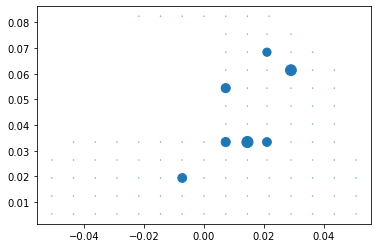

[93. 64. 62. 94. 50. 61. 52.]


KeyboardInterrupt: 

In [4]:
tactile = tactile_show()

for i in range(100):
    tactile.visualize(0,113)
    time.sleep(0.1)